### Bank Churn Prediction

In [ ]:
# Data analysis libraries
# Visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Machine learning libraries: preprocessing, model, and metrics
from sklearn.preprocessing import StandardScaler, LabelBinarizer, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, make_scorer, roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, average_precision_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Imbalanced dataset handling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline
from sklearn.pipeline import Pipeline

bankChurners = pd.read_csv("./assets/BankChurners.csv")
bankChurners.head(5)


CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [547]:
#Execlude the last two columns as recomended from the dataset owner 
bankChurners = bankChurners.iloc[:, :-2]
bankChurners.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [548]:
print(bankChurners.describe())

          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%            

In [549]:
bankChurners.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

 ### Exploratory Data Analysis (EDA)

In [550]:
attrition_counts = bankChurners['Attrition_Flag'].value_counts()

# Printing the count of each category
print(attrition_counts)

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


Axes(0.125,0.11;0.775x0.77)

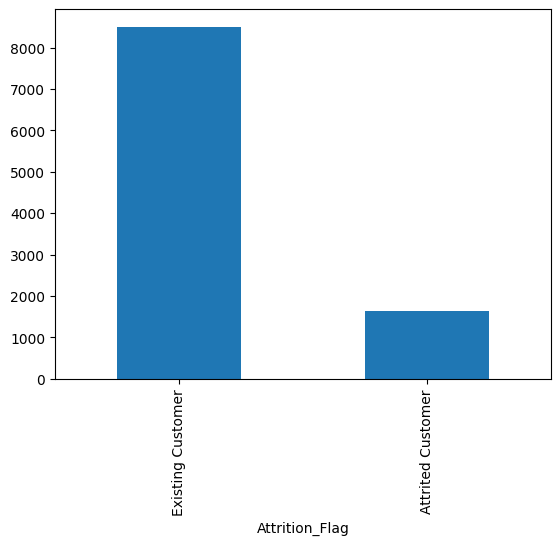

In [551]:
bankChurners.Attrition_Flag.value_counts()
print(bankChurners.Attrition_Flag.value_counts().plot(kind='bar'))

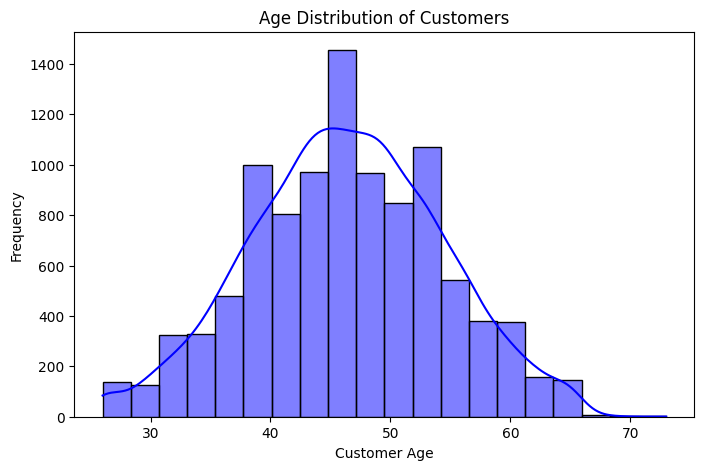

In [552]:
# Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(bankChurners['Customer_Age'], kde=True, bins=20, color='blue')
plt.title("Age Distribution of Customers")
plt.xlabel("Customer Age")
plt.ylabel("Frequency")
plt.show()

<Figure size 2500x2500 with 0 Axes>

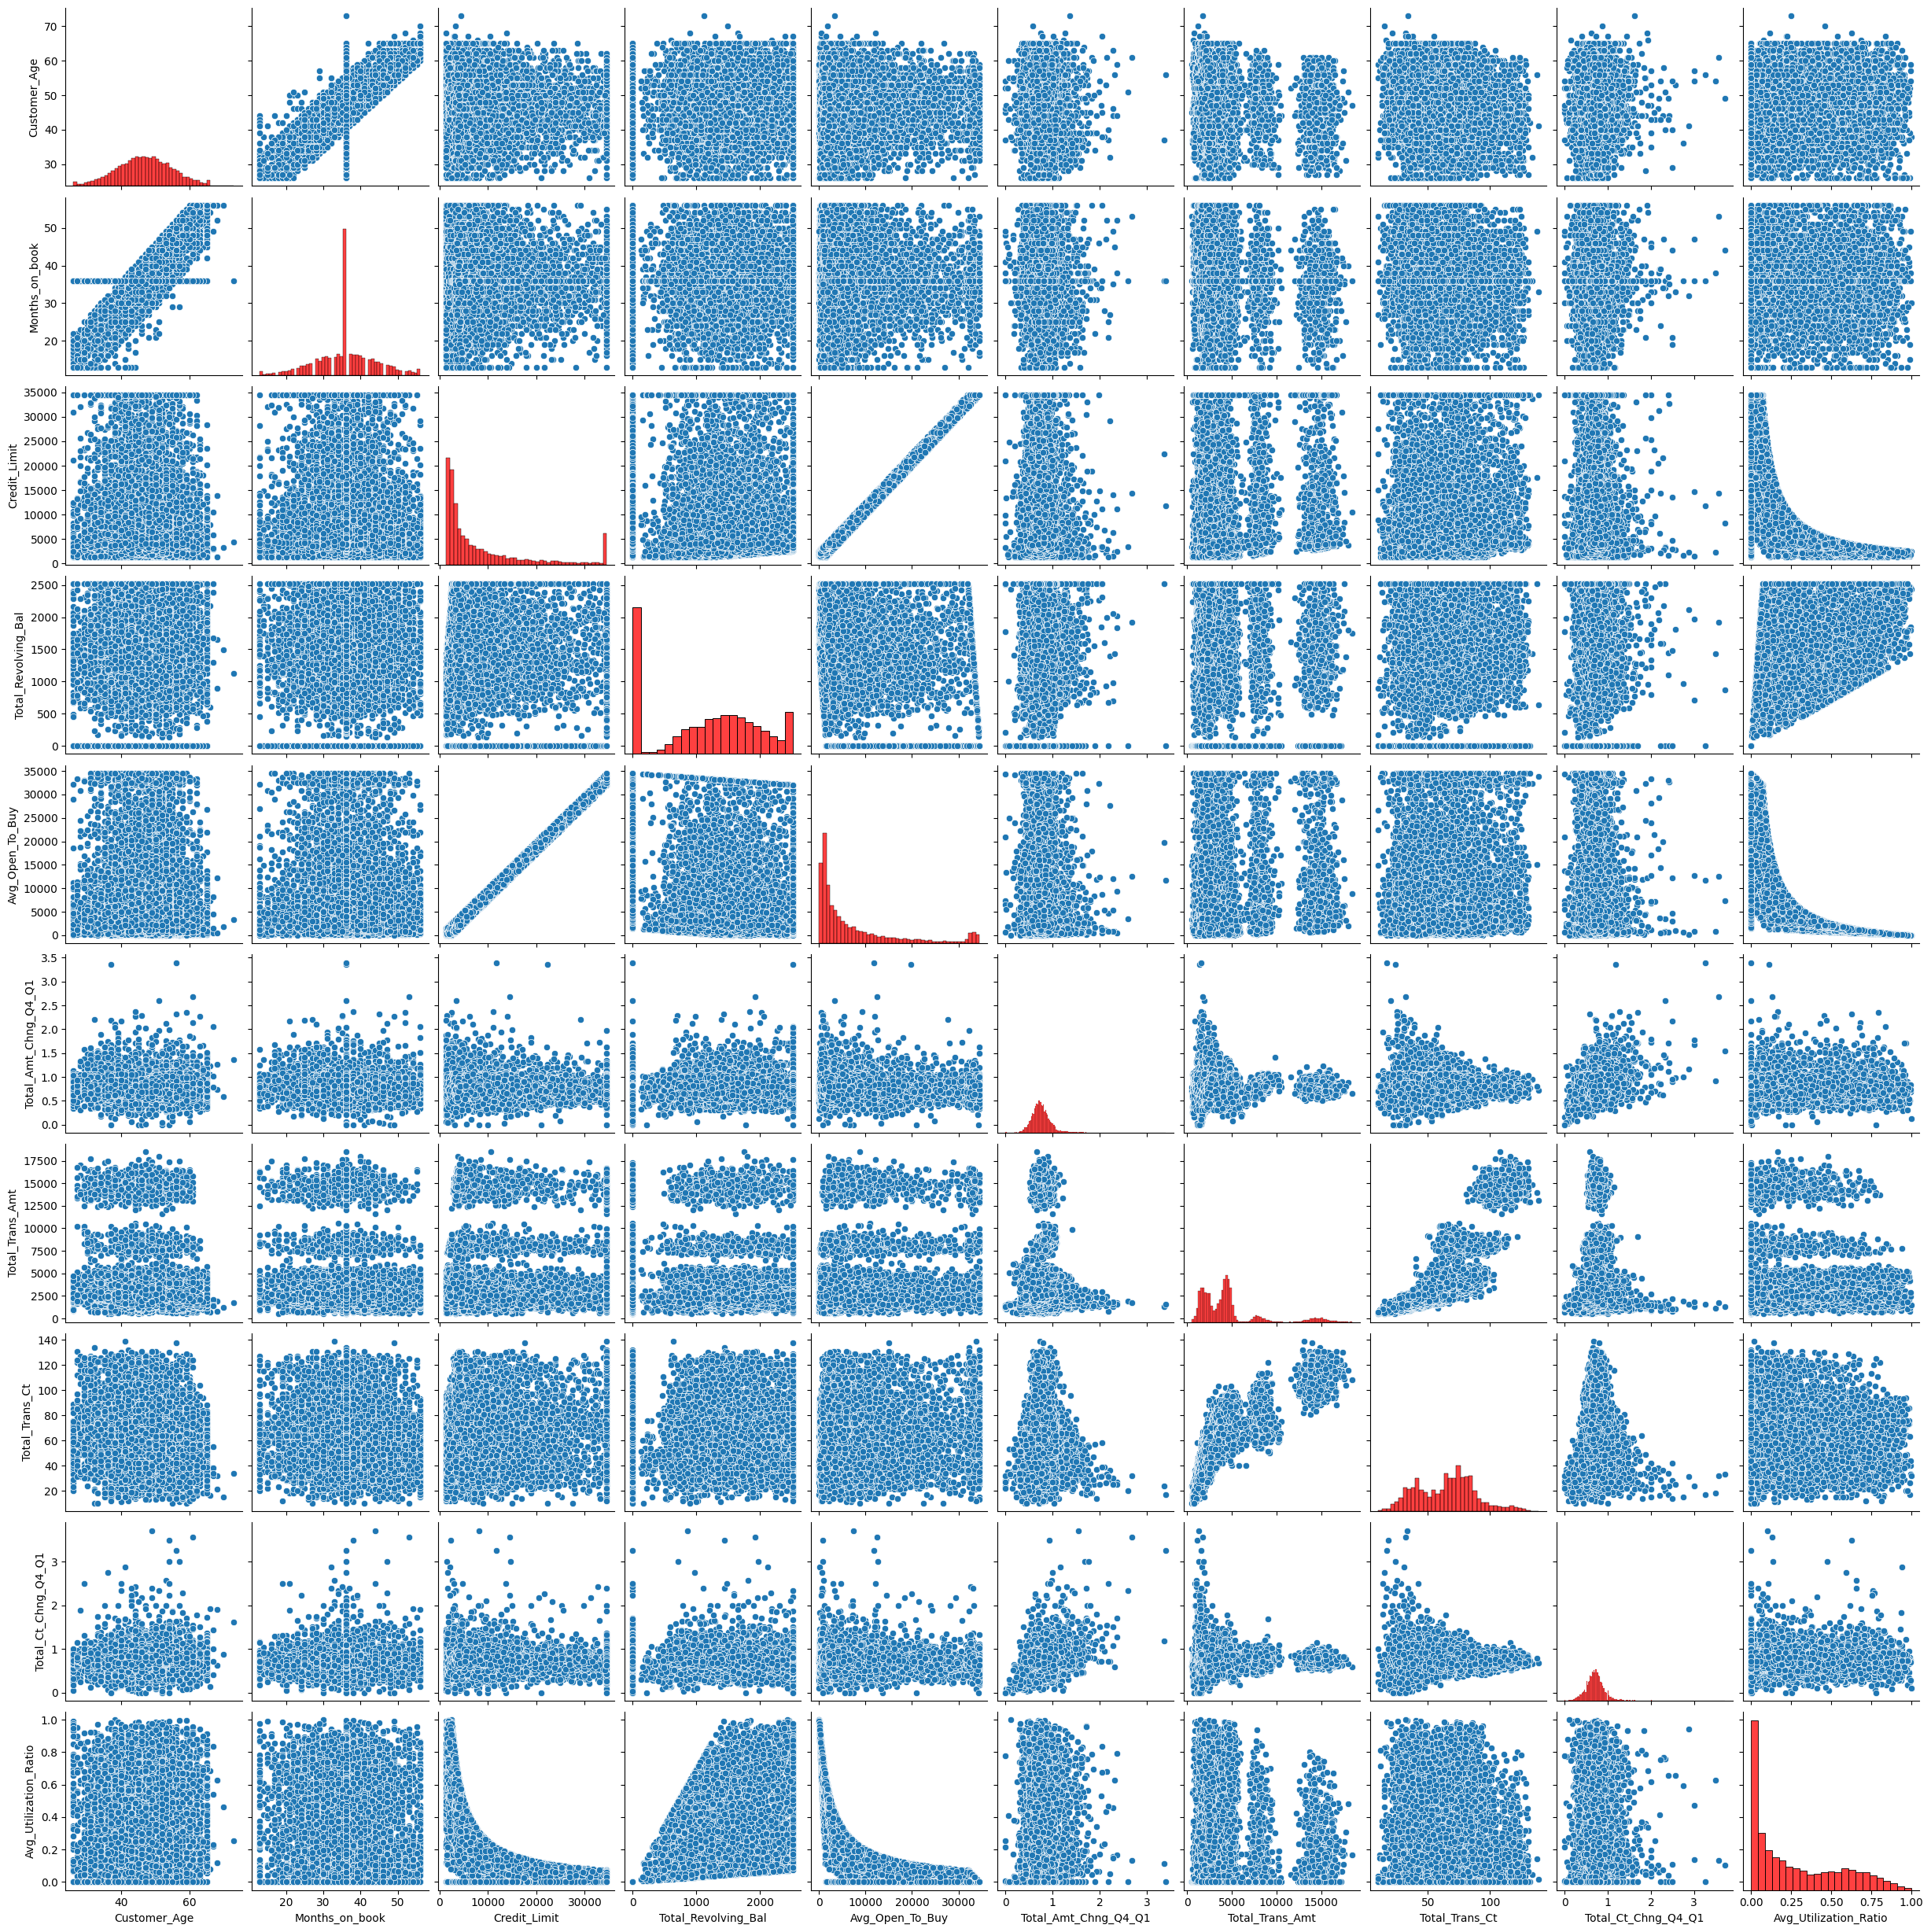

In [553]:
numeric_df = bankChurners.select_dtypes(include=['number'])

#Exclude unrelated numeric columns and categorical columns
selected_columns = [
    'Customer_Age',       
    'Months_on_book',    
    'Credit_Limit', 
    'Total_Revolving_Bal', 
    'Avg_Open_To_Buy', 
    'Total_Amt_Chng_Q4_Q1', 
    'Total_Trans_Amt', 
    'Total_Trans_Ct', 
    'Total_Ct_Chng_Q4_Q1', 
    'Avg_Utilization_Ratio'   
]

numeric_df = numeric_df[selected_columns]

plt.figure(figsize=(25, 25))
sns.pairplot(numeric_df, diag_kws={'color':'red'})
plt.show()

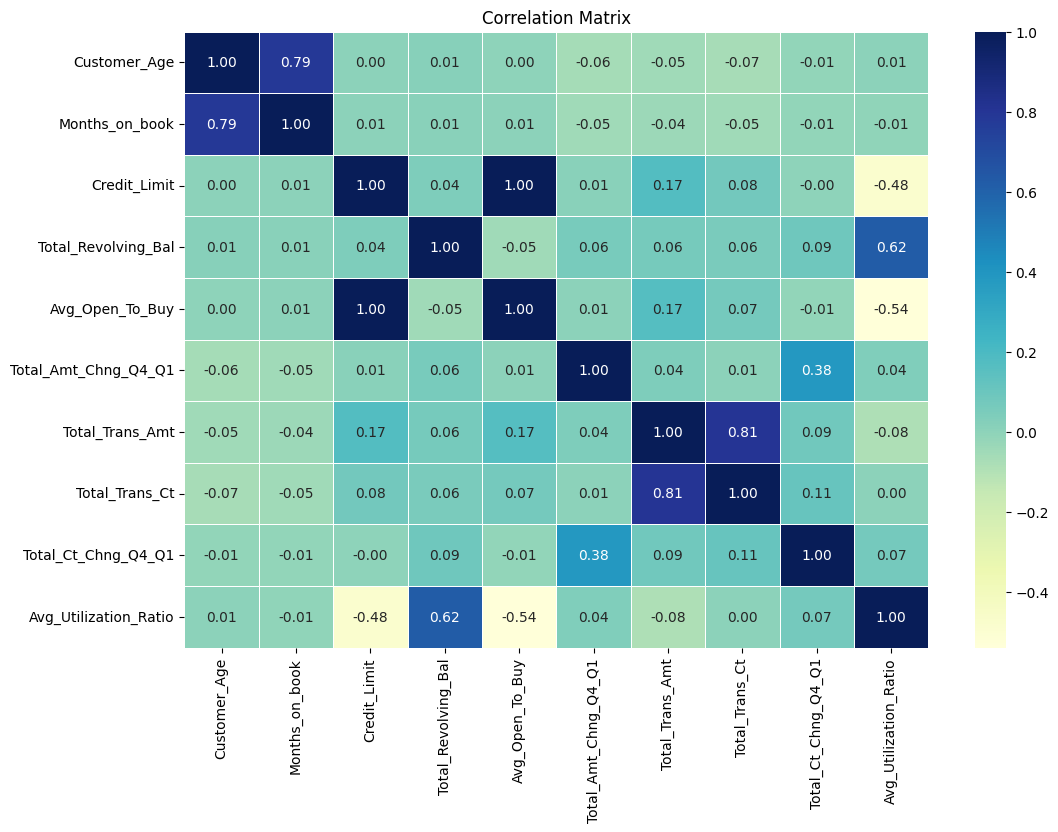

In [554]:
corelation= numeric_df.corr()
round(corelation,2)

plt.figure(figsize=(12, 8))
sns.heatmap(corelation, annot=True, fmt=".2f",  cmap="YlGnBu", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

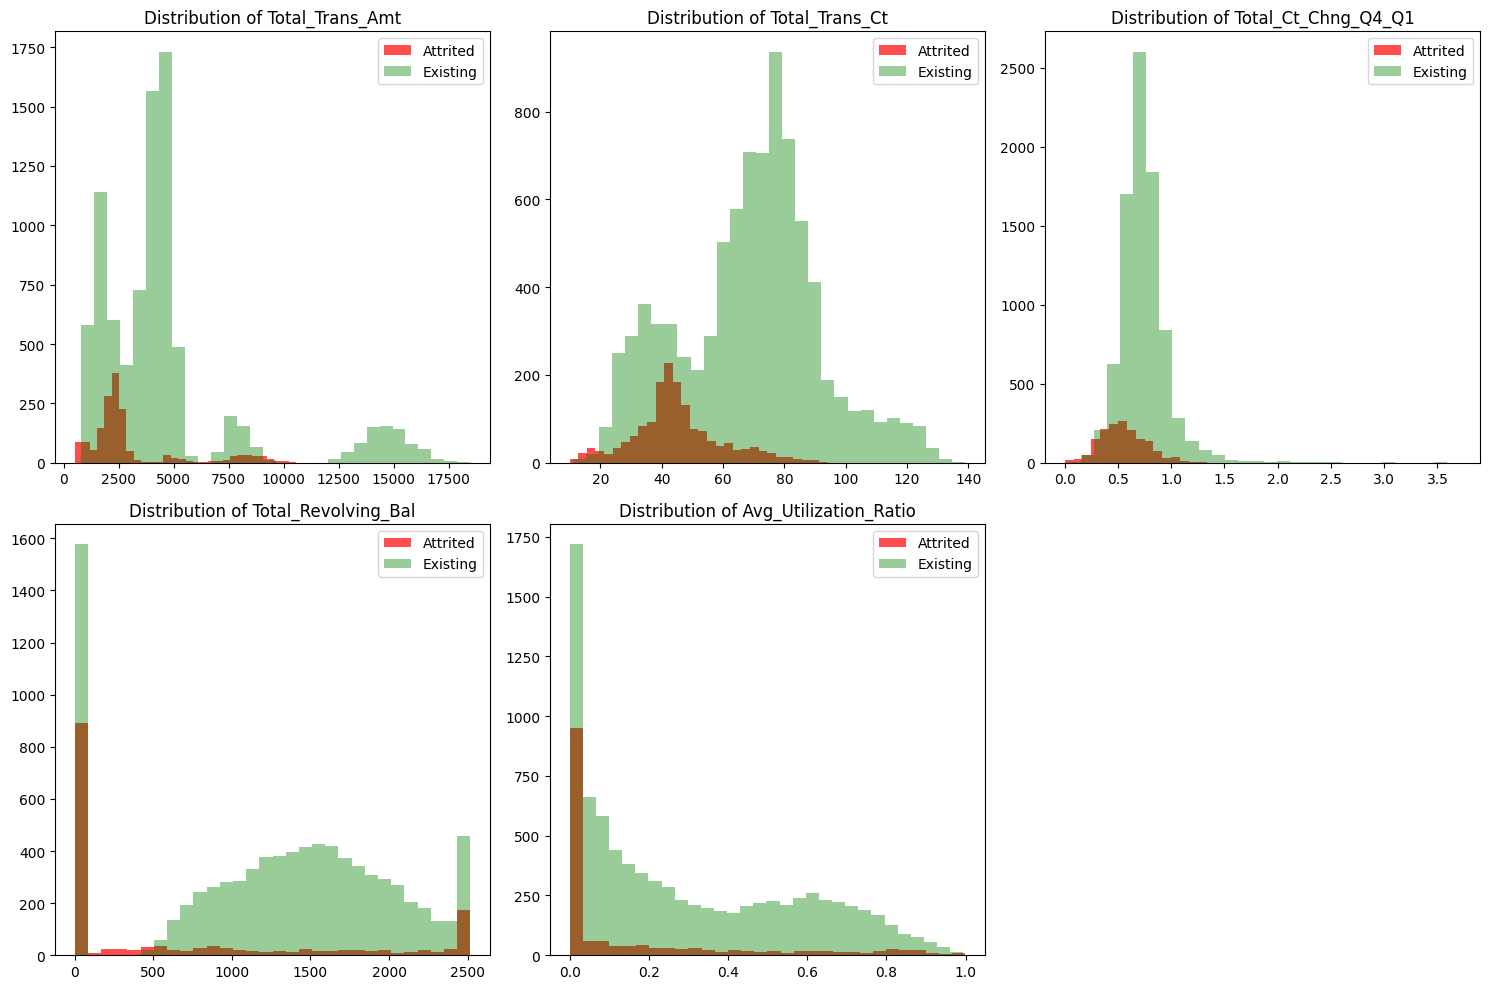

In [555]:
#Top feature that determined ffrom the other notebook #feature_importance_df
top_important_features  = ['Total_Trans_Amt',
                   'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio']


# Filter the DataFrame for Attrited Customers and Existing Customers
attrited_customers = bankChurners[bankChurners['Attrition_Flag'] == 'Attrited Customer']
existing_customers = bankChurners[bankChurners['Attrition_Flag'] == 'Existing Customer']


# Set the number of bins and figure size
bins = 30
plt.figure(figsize=(15, 10))

# Create a histogram for each column
for i, column in enumerate(top_important_features, 1):
    # This layout needs to be adjusted based on the number of columns
    plt.subplot(2, 3, i)
    plt.hist(attrited_customers[column], bins=bins,
             alpha=0.7, label='Attrited', color='red')
    plt.hist(existing_customers[column], bins=bins,
             alpha=0.4, label='Existing', color='green')
    plt.title(f'Distribution of {column}')
   
    plt.legend()

plt.tight_layout()
plt.show()

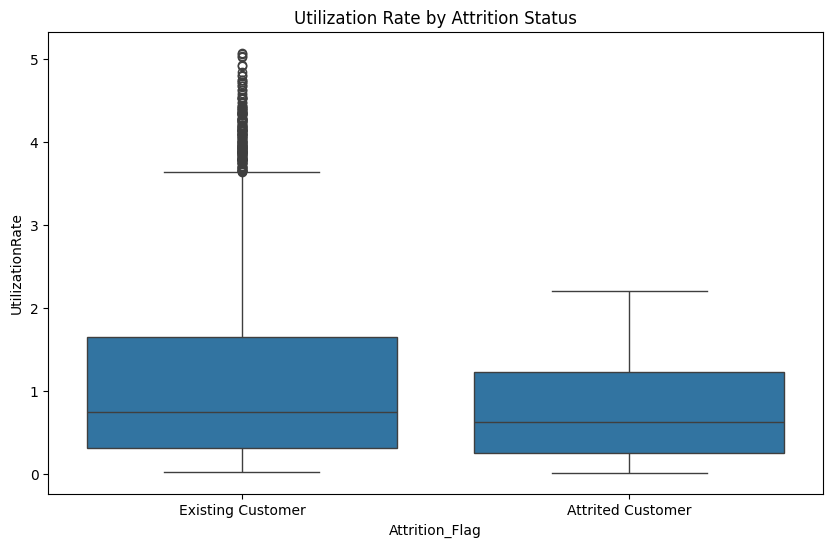

In [556]:
bankChurners['UtilizationRate'] = bankChurners['Total_Trans_Amt'] / bankChurners['Credit_Limit']
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition_Flag', y='UtilizationRate', data=bankChurners)
plt.title('Utilization Rate by Attrition Status')
plt.show()

In [557]:
#categorical_columns = ['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Gender']

{categorical_column: list(bankChurners[categorical_column].unique())
 for categorical_column in bankChurners.select_dtypes('object').columns}


{'Attrition_Flag': ['Existing Customer', 'Attrited Customer'],
 'Gender': ['M', 'F'],
 'Education_Level': ['High School',
  'Graduate',
  'Uneducated',
  'Unknown',
  'College',
  'Post-Graduate',
  'Doctorate'],
 'Marital_Status': ['Married', 'Single', 'Unknown', 'Divorced'],
 'Income_Category': ['$60K - $80K',
  'Less than $40K',
  '$80K - $120K',
  '$40K - $60K',
  '$120K +',
  'Unknown'],
 'Card_Category': ['Blue', 'Gold', 'Silver', 'Platinum']}

### Preprocess data 

In [558]:
def preprocess_data(df):
    df = df.copy()
    
    # Drop last two columns
    df = df.drop(df.columns[-2:], axis=1)

    # Drop columns
    columns_to_drop = ['CLIENTNUM']
    df.drop(columns_to_drop, axis=1, inplace=True)

    # Replace 'Unknown' with np.NaN
    df.replace('Unknown', np.nan, inplace=True)

    # Define ordering for ordinal encoding
    education_ordering = ['Uneducated', 'High School',
                          'College', 'Graduate', 'Post-Graduate', 'Doctorate']
    income_ordering = ['Less than $40K', '$40K - $60K',
                       '$60K - $80K', '$80K - $120K', '$120K +']

    # Separate target before any column manipulation
    y = df['Attrition_Flag']
    df = df.drop('Attrition_Flag', axis=1)

     # Preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('impute_then_encode', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('ordinal', OrdinalEncoder(categories=[
                 education_ordering, income_ordering]))
            ]), ['Education_Level', 'Income_Category']),
            ('binary', Pipeline([
                ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
                # Adjusted to drop 'if_binary' to handle binary encoding
                ('binarizer', OneHotEncoder(drop='if_binary'))
            ]), ['Gender']),
            ('onehot', OneHotEncoder(), ['Marital_Status', 'Card_Category'])
        ],
        remainder='passthrough'
    )

 
   # Fit and transform the data
    X_transformed = preprocessor.fit_transform(df)

    # Convert transformed X back to DataFrame to apply scaling
    columns = preprocessor.get_feature_names_out()
    X_transformed = pd.DataFrame(X_transformed, columns=columns)

    # Scaling all features
    scaler = StandardScaler()
    X = scaler.fit_transform(X_transformed)
    X = pd.DataFrame(X, columns=columns)

    # Convert y to binary using LabelBinarizer
    y = LabelBinarizer().fit_transform(y.to_numpy())
    y = y.ravel()  # Convert from a 2D array to a 1D array

    return X, y

In [559]:
X, y = preprocess_data(bankChurners)

In [560]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.2, random_state=42)

In [561]:
# Initialize SMOTE
# This helps balance the dataset and improves the performance of machine learning models, especially for the minority class
smote = SMOTE(random_state=42)

# Apply SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

d:\GitHub\CreditCardChurn\venv\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
d:\GitHub\CreditCardChurn\venv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [562]:
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),    
    RandomForestClassifier()
]

model_names = [
    "Logistic Regression",
    "Support Vector Machine",
    "Decision Tree",
    "Random Forest"
]

for model, name in zip(models, model_names):
    # Fit the model to the resampled training data
    model.fit(X_train_resampled, y_train_resampled)
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))


Logistic Regression: 85.63%
Support Vector Machine: 90.46%
Decision Tree: 90.55%
Random Forest: 94.58%


In [563]:
def plot_ROC(model, X_test, y_test):

        # Prediction and Classification Report
        y_pred = model.predict(X_test)
        print(classification_report(y_test, y_pred))

        # Compute probabilities for the positive class
        y_probs = model.predict_proba(X_test)[:, 1]

        # Compute ROC curve and ROC area
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)

        # Plotting the ROC Curve
        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, color='red',
                lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC for {model}')#Receiver Operating Characteristic
        plt.legend(loc="lower right")
        plt.show()

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1304
           1       0.96      0.97      0.97      6798

    accuracy                           0.95      8102
   macro avg       0.91      0.88      0.90      8102
weighted avg       0.94      0.95      0.94      8102



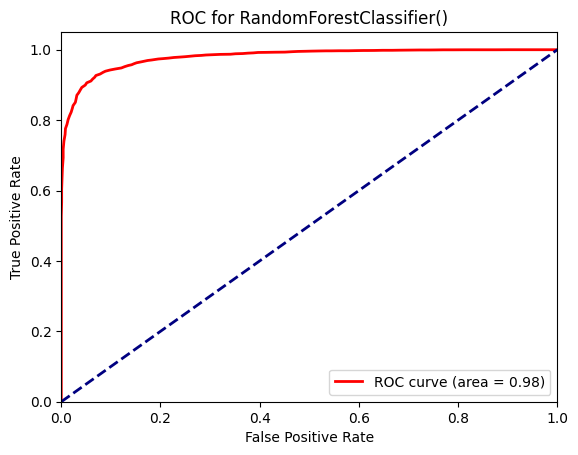

In [564]:
# Reference to the Random Forest model
rf_model = models[3]
plot_ROC(rf_model, X_test, y_test)

              precision    recall  f1-score   support

           0       0.69      0.75      0.72      1304
           1       0.95      0.93      0.94      6798

    accuracy                           0.91      8102
   macro avg       0.82      0.84      0.83      8102
weighted avg       0.91      0.91      0.91      8102



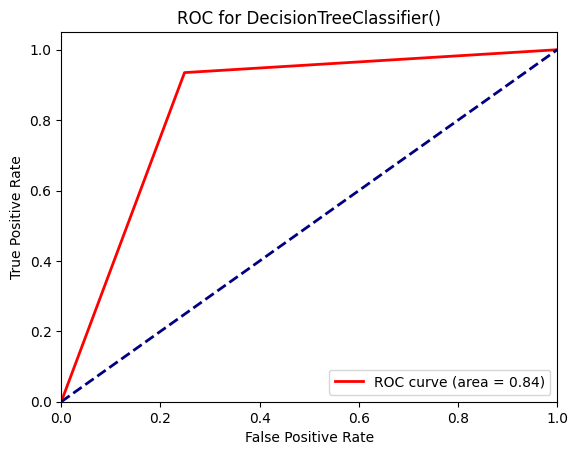

In [565]:
# The Decistion Tree  model
dt_model = models[2]
plot_ROC(dt_model, X_test, y_test)

In [566]:
def optimize_model(X_train, y_train, X_test, y_test):
    # Define the parameter grid to search
    param_grid = {
            'classifier__n_estimators': [50, 100],
            'classifier__max_depth': [10, None],
            'classifier__min_samples_split': [2, 5],
            'classifier__min_samples_leaf': [1, 2],
            'classifier__max_features': ['sqrt']
        }

    # Define scoring
    scoring = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score, average='weighted'),
        'recall': make_scorer(recall_score, average='weighted'),
        'f1': make_scorer(f1_score, average='weighted')
    }

      # Create a pipeline that first applies SMOTE and then fits a RandomForest classifier
    pipeline = ImPipeline([
        ('smote', SMOTE(random_state=42)),
        ('classifier', RandomForestClassifier(random_state=42))
    ])

    # Initialize GridSearchCV with the pipeline
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3,
                               scoring=scoring, verbose=1, n_jobs=-1, refit='recall')

    # Perform grid search on the original unresampled training data
    grid_search.fit(X_train, y_train)

    # Print best parameters and best score
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score: {:.3f}".format(grid_search.best_score_))


    # Use the best estimator to make predictions
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)


    # Evaluate the predictions
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print scores with 2 decimal places
    print("Precision: {:.3f}".format(precision))
    print("Recall: {:.3f}".format(recall))
    print("F1-score: {:.3f}".format(f1))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    

optimize_model(X_train, y_train, X_test, y_test)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


d:\GitHub\CreditCardChurn\venv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
d:\GitHub\CreditCardChurn\venv\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
d:\GitHub\CreditCardChurn\venv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tag

Best Parameters: {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best Score: 0.947
Precision: 0.945
Recall: 0.946
F1-score: 0.945
Confusion Matrix:
[[1039  265]
 [ 170 6628]]


In [567]:
def save_predictions(X_test, y_test, best_model, output_path='./output/bank_churner_predictions.csv'):
    # Predict attrition using the best model
    y_pred = best_model.predict(X_test)

    # Convert predictions back to categorical labels if needed
    y_pred_labels = ['Attrited Customer' if pred == 1 else 'Existing Customer' for pred in y_pred]

    # Create a DataFrame to save results
    results_df = pd.DataFrame(X_test, columns=best_model.named_steps['smote'].get_feature_names_out())
    results_df['Actual Attrition'] = ['Attrited Customer' if true == 1 else 'Existing Customer' for true in y_test]
    results_df['Predicted Attrition'] = y_pred_labels

    # Save the results to a CSV file
    results_df.to_csv(output_path, index=False)

    print(f"Predictions saved to {output_path}")
